# HW 6: Neural Network

In this guided tutorial, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

If you need an introduction to CNNs, you can read this: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

## Part 0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/about. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. (For most of you: just use commands 'pip install tensorflow' followed by 'pip install keras') <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

Let us first import keras:

In [122]:
import keras
keras.__version__

'2.10.0'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [123]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

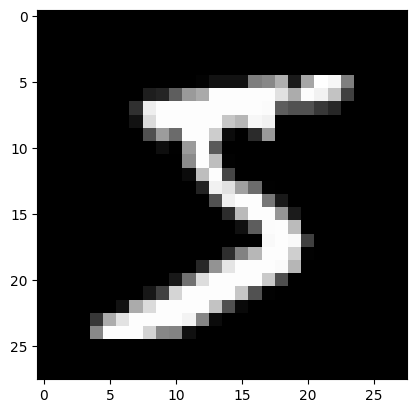

This is a handwritten number  5
Shape of input matrix:  (60000, 28, 28)


In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

image_nr = 0
plt.imshow(train_images[image_nr], cmap='gray', vmin=0, vmax=255)
plt.show()
print('This is a handwritten number ', train_labels[image_nr])

print('Shape of input matrix: ', train_images.shape)

#### Question 1.1 (5 points): The 'shape' of the matrix is (60000, 28, 28). What do each of these numbers mean?

Response: the shape of this matrix means it takes in (input) 60000 training images(batch_size) with 28 dimensions on x(sequence length) and 28 features on y(features) axis of the image, also known as the resultion of the image.

Our workflow will be as follows: first we will present our neural network with the training data, train_images, and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [125]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as "transforming" your data. Some  data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully  representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple (or sometimes more complex) layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 1.2 (5 points): Search internet and keras help to understand what "softmax" is doing. Can you explain why it is a popular choice for mutlti-class classification problems?
Response: Softmax is an activation function that is used to predict a probability distribution for each class that adds up to 1.0 in a multi-class problem, which it converges quicker. 

#### Question 1.3 (5 points): Could you explain why we use 'relu' in first layer and 'softmax' in the second layer? A friend tells you that 'tanh' can be a good activation function. To try it out, would you replace 'relu', 'softmax' or both? Justify your answer.
Response: We use relu in the first layer to avoid vanishing gradient problem then use softmax since it is a multi-class problem to process all 28 features. Since tanh does not consider all the classes it would produce invalid results.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function. 'rmsprop' is specific type of the gradient descent algorithm. Keras offers a few versions of the optimizer.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [126]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 1.4 (5 points): Search internet and keras documentation to understand 'categorical_crossentropy'. Could you explain why we use 'categorical_crossentropy' for loss function in this application?

Response: Categorial cross-entropy can be used to measure the difference between two probability distrbution, this would be great for this application since softmax will split out a probability distribution.

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [127]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [128]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn each digit into a one-hot vector of length 10.

In [129]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data. We can specify how many epoch of gradient descent are we using (how many passes through the whole data set) and what is the size of mini-batch for a single weigth update.

In [130]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9890


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an high accuracy (around 98%) on the training data. Now let's check that our model performs well on the test set too:

In [131]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 610us/step - loss: 0.0735 - accuracy: 0.9772


In [132]:
print('test_acc:', test_acc)

test_acc: 0.9771999716758728


Our test set accuracy will be a bit lower than the training set accuracy. 

#### Question 1.5: What will be an example of overfiting here?

Response: If the training set acc is 98% but while the test set is at a drastic different like 55%.

#### Question 1.6 (5 points): Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

Response: As we increase the epochs the accuracy from the training set increases, test set decrease caused by over fitting. When we decrease epoch will decrease accuracy in train, it will increase train acc caused by underfitting. As we increase the batch size it will decrease the test set accuracy. When we decrease batch size it will increase accuracy in test.

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Part 1:   Convolutional Neural Network (CNN) 

In this Part, we will learn how to train CNNs. CNNs are a very popular type of a neural network, particularly for data that come in a vector, matrix, or tensor (3 or higher dimensional array) form, such as sequences, images, and videos. The main innovation compared to the feedforward neural network, which relies on dense layers is a new type of a layer, called the convolutional layer. A neuron (called the filter) in CNN is a small vector, matrix (e.g., size 3x3 or 5x5) or a tensor that scans the input vector, matrix, or a tensor and produces a new vector, matrix, or a tensor. You can decide to use many such neurons in each convolutional layer.

In additon to the convolutional layer, CNNs also inroduce 'MaxPooling' layer which scans a block of an input matrix and finds the maximum value within each block. An outcome of this operation is reduction of the matrix size. Finally, CNNs also use the 'Flatten' operation which vectorizes the input matrix (e.g., converts a 10x10 input matrix into a vector of size 100). After the 'Flatten" operation CNNs typically add one or more dense layers.

For more details about CNN, please consult this blog: 
 https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [149]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

The following block selects a subset of images from the MNIST data.

In [150]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 10000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

print(len(sevens))
print(len(not_sevens))

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

6265
10000


#### Question 2.1 (5 points): Write code to check how many 'sevens' and how many 'not_sevens' there are in our training data? What is the accuracy of a classifier that always predicts that the input is not a seven?

Response: There are 6265 sevens and 10000 not sevens. The accuracy is roughly around 62%.

The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [151]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [152]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(learning_rate=0.0002, amsgrad=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [153]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [154]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_9 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                 66        
                                                                 
 activation_10 (Activation)  (None, 2)                 0         
                                                     

#### Question 2.2 (5 points): From the above summary, can you explain the architecture of this CNN?

Response: The CNN is 1 layer has 32 units and it goes through relu then outputs a 26*26 shape which enters max pool to flatten to a layer of 32 units. Next we dense it and pass it through softmax to get 2 output layers.

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [155]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [156]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Epoch 1/10
255/255 [==============================] - 1s 4ms/step - loss: 0.6713 - accuracy: 0.5848 - val_loss: 0.5331 - val_accuracy: 0.8972
Epoch 2/10
255/255 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.6148 - val_loss: 0.5147 - val_accuracy: 0.8972
Epoch 3/10
255/255 [==============================] - 1s 4ms/step - loss: 0.6348 - accuracy: 0.6148 - val_loss: 0.5219 - val_accuracy: 0.8972
Epoch 4/10
255/255 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.6149 - val_loss: 0.4870 - val_accuracy: 0.8972
Epoch 5/10
255/255 [==============================] - 1s 4ms/step - loss: 0.5990 - accuracy: 0.6236 - val_loss: 0.4644 - val_accuracy: 0.8991
Epoch 6/10
255/255 [==============================] - 1s 4ms/step - loss: 0.5800 - accuracy: 0.6652 - val_loss: 0.4438 - val_accuracy: 0.9092
Epoch 7/10
255/255 [==============================] - 1s 4ms/step - loss: 0.5595 - accuracy: 0.7252 - val_loss: 0.4656 - val_accuracy: 0.9370
Epoch 

Let us plot the accuracy. 

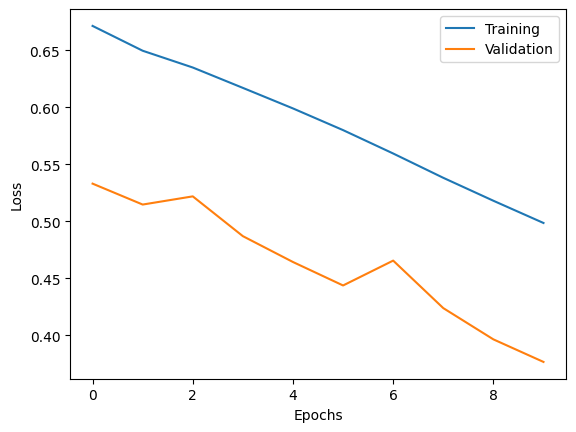

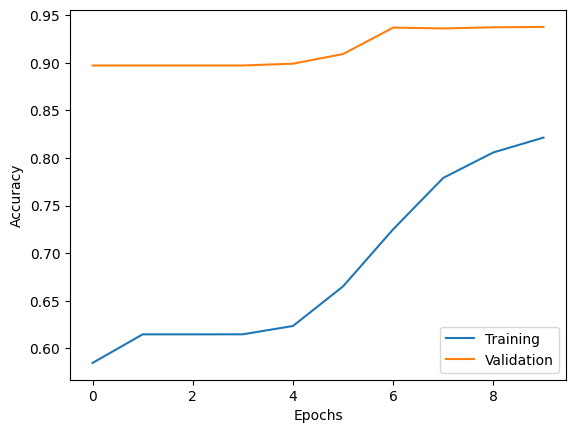

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [158]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.37677937746047974
Test Accuracy: 0.9376999735832214


Let us visualize our model Predictions!

2/2 [==============================] - 0s 2ms/step


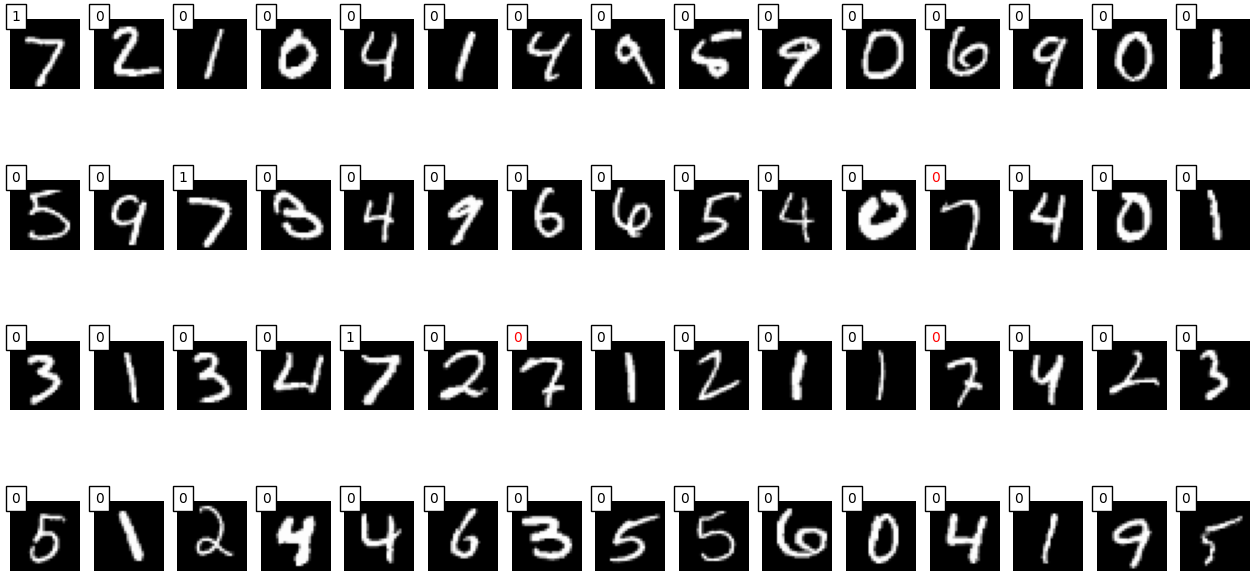

In [159]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

show_results(model)

#### Question 2.3 (5 points): Can you discuss the performance of the CNN model? What kind of errors is it making?

Response: The test set has 89% accuracy while the training set has a 61% accuracy. This implies the model is underfitting and we can improve it by increasing the epoch of the model.

#### Question 2.4 (5 points): Go back to step 0, change number of epochs to 10 and run it again. How did it impact the accuracy?

Response: The test accuracy is 93% and the train accuracy is 82%. This made the model much better.

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture. We will train it for only 5 epochs to save time.

In [160]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [161]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_28 (Dense)            (None, 16)                86544     
                                                                 
 activation_12 (Activation)  (None, 16)                0         
                                                     

In [162]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

nb_epoch = 5
model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 2s 6ms/step - loss: 0.1021 - accuracy: 0.9627 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 2/5
255/255 [==============================] - 1s 5ms/step - loss: 0.0577 - accuracy: 0.9809 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 3/5
255/255 [==============================] - 1s 5ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 4/5
255/255 [==============================] - 1s 5ms/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 5/5
255/255 [==============================] - 1s 5ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.0256 - val_accuracy: 0.9908


In [163]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.025637606158852577
Test accuracy: 0.9908000230789185


2/2 [==============================] - 0s 2ms/step


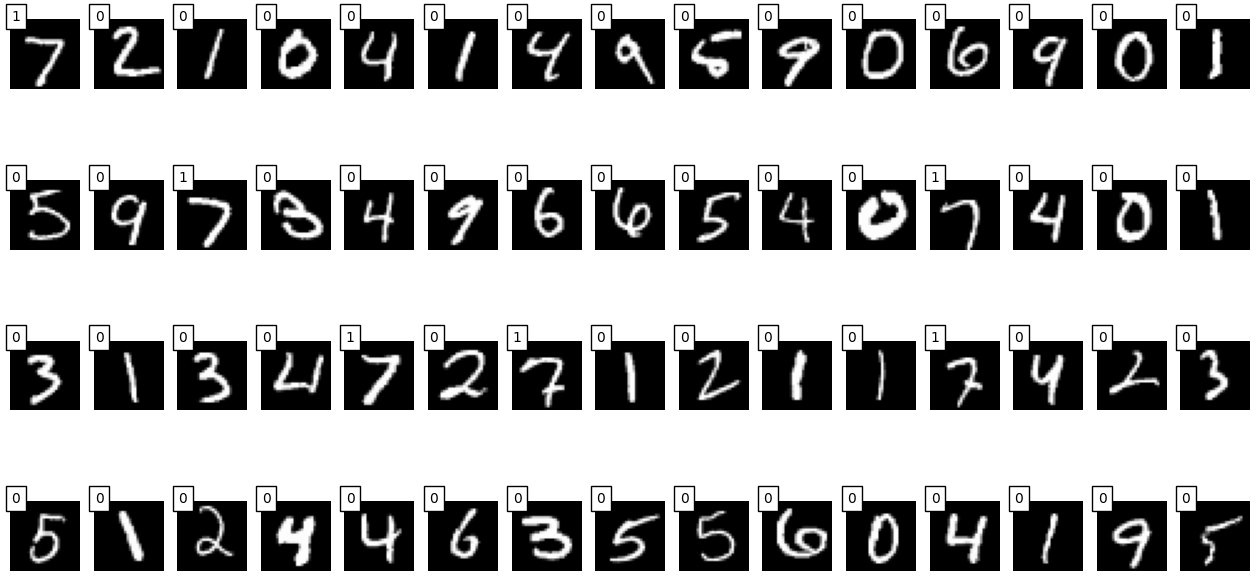

In [164]:
show_results(model)

#### Question 2.5 (5 points): Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

Response: This is different from the first one since this is a 2 layer CNN. So it first pass through relu then the max pool outputs a bigger shape than the model 1. Since the output shape is bigger and the there is 2 dense function, this yield a higher param. So a better peformance than model 1.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [165]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [166]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_14 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 800)             

In [167]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
255/255 [==============================] - 3s 9ms/step - loss: 0.1188 - accuracy: 0.9557 - val_loss: 0.0536 - val_accuracy: 0.9820
Epoch 2/5
255/255 [==============================] - 2s 8ms/step - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 3/5
255/255 [==============================] - 3s 11ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0334 - val_accuracy: 0.9886
Epoch 4/5
255/255 [==============================] - 2s 9ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 5/5
255/255 [==============================] - 2s 9ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0361 - val_accuracy: 0.9878


In [168]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.03613591939210892
Test accuracy: 0.9878000020980835


2/2 [==============================] - 0s 2ms/step


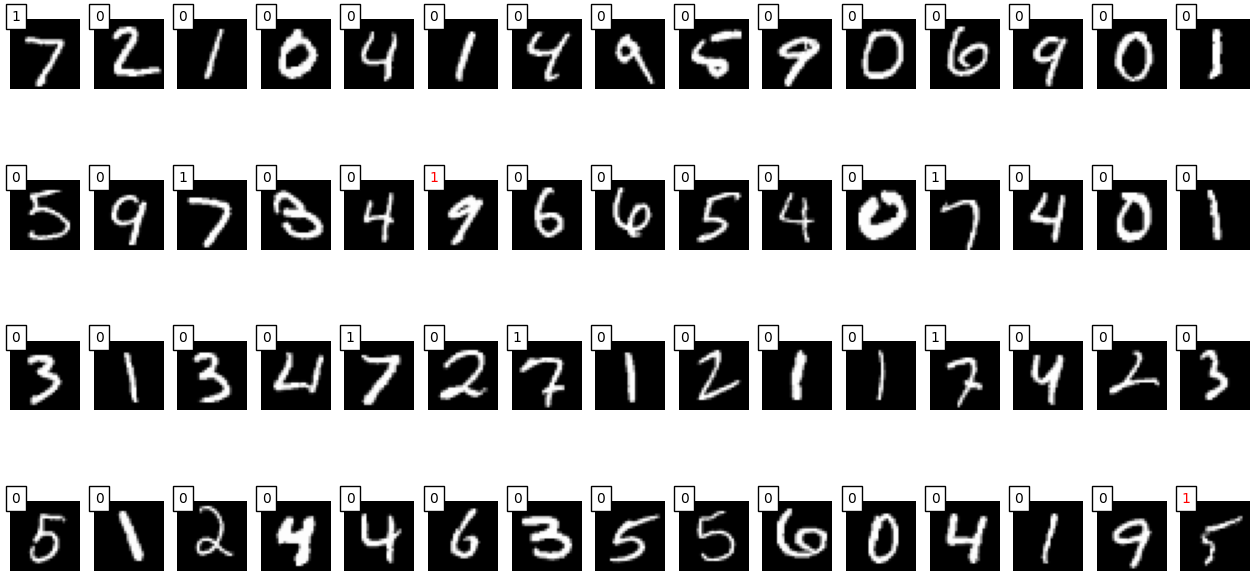

In [169]:
show_results(model)

Another small improvement.

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments. Try to get the best performance with only 2 training epochs!


In [243]:
nb_epoch = 2

In [244]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    show_results(model)
    model.summary()

An example of running this function

Epoch 1/2
255/255 [==============================] - 2s 7ms/step - loss: 0.2752 - accuracy: 0.9091 - val_loss: 0.1201 - val_accuracy: 0.9703
Epoch 2/2
255/255 [==============================] - 2s 7ms/step - loss: 0.1582 - accuracy: 0.9437 - val_loss: 0.1161 - val_accuracy: 0.9638
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.11605586856603622
Test accuracy: 0.9638000130653381
2/2 [==============================] - 0s 1ms/step
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 activation_279 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                          

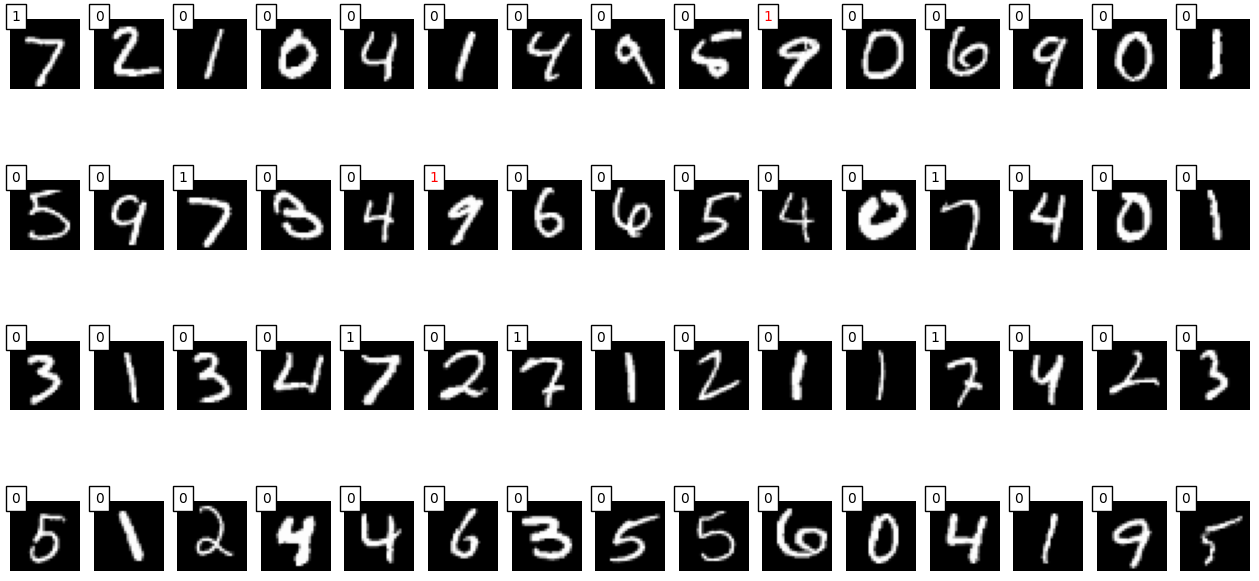

In [245]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Epoch 1/2
255/255 [==============================] - 8s 31ms/step - loss: 0.3962 - accuracy: 0.7966 - val_loss: 0.1299 - val_accuracy: 0.9573
Epoch 2/2
255/255 [==============================] - 8s 31ms/step - loss: 0.1500 - accuracy: 0.9460 - val_loss: 0.0730 - val_accuracy: 0.9764
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.07304498553276062
Test accuracy: 0.9764000177383423
2/2 [==============================] - 0s 5ms/step
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_171 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 activation_289 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 conv2d_172 (Conv2D)         (None, 24, 24, 32)        9248      
                                             

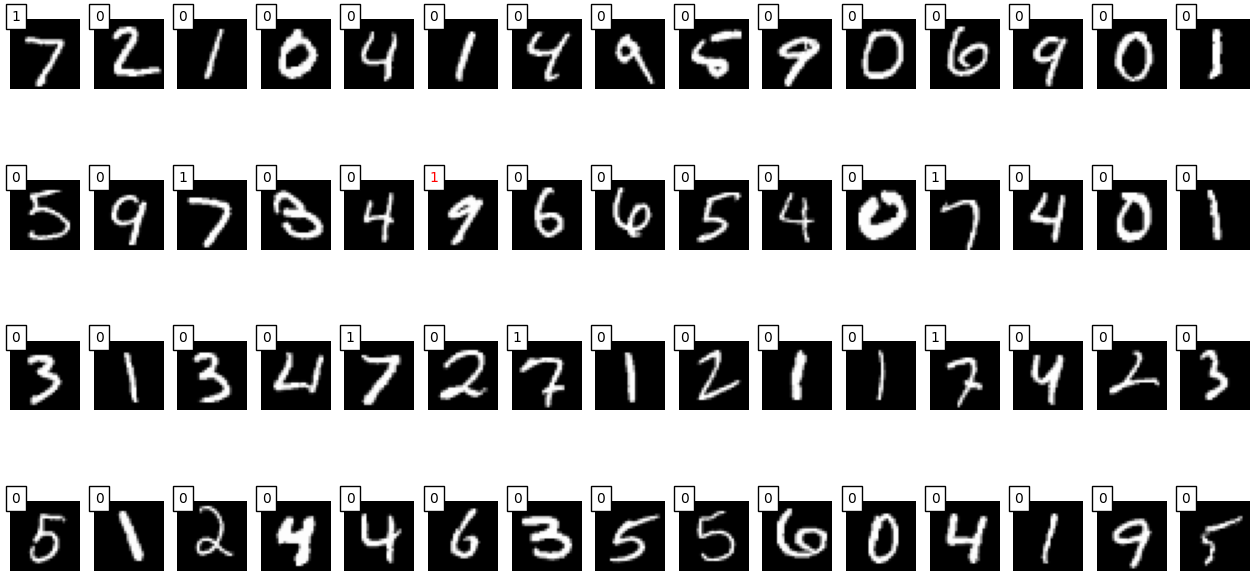

In [248]:
# Here is an example of running build_model() with new hyperparameters
%timeit -n1 -r1 build_model(num_conv = 3, num_dense = 3)

Epoch 1/2
255/255 [==============================] - 2s 7ms/step - loss: 0.3033 - accuracy: 0.8954 - val_loss: 0.1221 - val_accuracy: 0.9710
Epoch 2/2
255/255 [==============================] - 2s 7ms/step - loss: 0.1631 - accuracy: 0.9418 - val_loss: 0.1349 - val_accuracy: 0.9560
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.13488715887069702
Test accuracy: 0.9559999704360962
2/2 [==============================] - 0s 2ms/step
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_170 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 activation_287 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                          

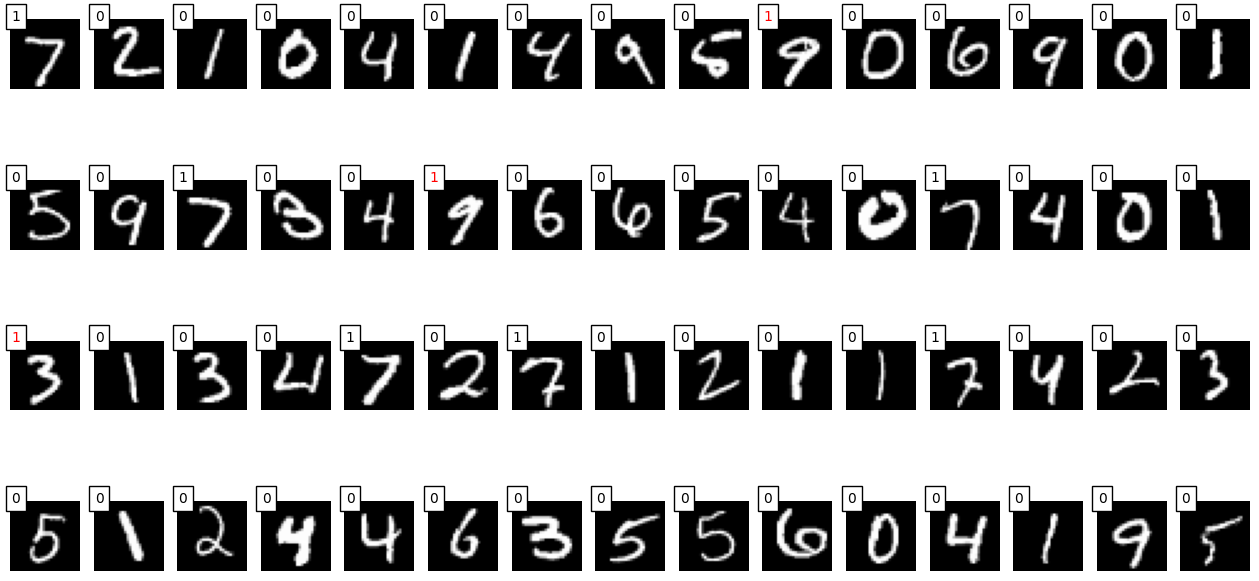

In [247]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

#### Question 2.6 (5 points): Try to change some of the **hyperparameters** without exploding the computational resources on your computer and only using 2 training epochs. 
What is the best accuracy you can get? How many trainable parameters does your model have? How long does the training take?

Response: The best result I got is 97.9% on test and 94.7% on train with 531330 params. It took around 17 seconds.

#### Question 2.7 (15 points)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [260]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
# sevens = np.where(y_train == 7)[0].tolist()
# not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 20000
# not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()
subset = np.random.choice(np.arange(0, np.size(y_train)), num_keepers, replace=False).tolist()
# print(len(sevens))
# print(len(not_sevens))

# subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

In [261]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [262]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(learning_rate=0.0002, amsgrad=True)

Epoch 1/10
313/313 [==============================] - 10s 31ms/step - loss: 0.2419 - accuracy: 0.9140 - val_loss: 0.0900 - val_accuracy: 0.9769
Epoch 2/10
313/313 [==============================] - 9s 30ms/step - loss: 0.0907 - accuracy: 0.9709 - val_loss: 0.0717 - val_accuracy: 0.9785
Epoch 3/10
313/313 [==============================] - 10s 31ms/step - loss: 0.0799 - accuracy: 0.9733 - val_loss: 0.0659 - val_accuracy: 0.9803
Epoch 4/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0710 - accuracy: 0.9761 - val_loss: 0.0599 - val_accuracy: 0.9826
Epoch 5/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.0653 - val_accuracy: 0.9814
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 7/10
313/313 [==============================] - 11s 34ms/step - loss: 0.0582 - accuracy: 0.9808 - val_loss: 0.0512 - val_accuracy: 

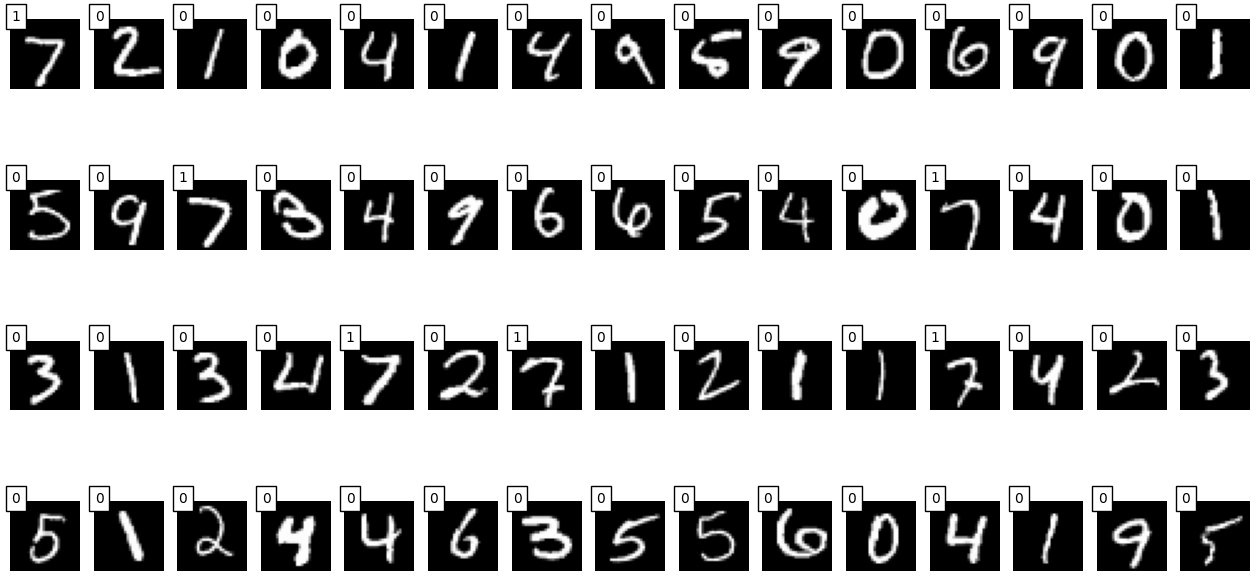

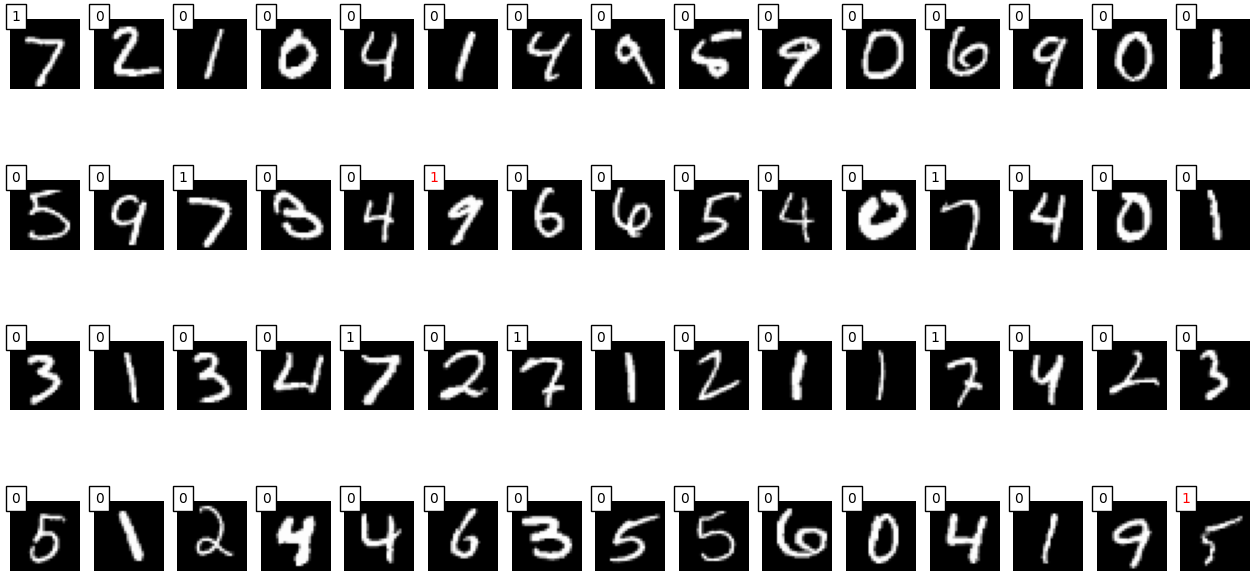

In [263]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')
%timeit -n1 -r1 build_model(num_conv = 3, num_dense = 3)
show_results(model)

#### Question 2.8 (30 points) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [324]:
from keras.datasets import cifar10

In [325]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
num_keepers = 20000
subset = np.random.choice(np.arange(0, np.size(y_train)), num_keepers, replace=False).tolist()

np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

# convert image to grayscale
X_train = np.dot(X_train, [0.2989, 0.5870, 0.1140])
X_test = np.dot(X_test, [0.2989, 0.5870, 0.1140])

In [326]:
from keras import backend as K

img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = y_train.astype(int)
Y_test = y_test.astype(int)

# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [327]:
# -- Initializing the values for the convolution neural network

nb_epoch = 5  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# SGD
optimizer = Adam(learning_rate=0.0002, amsgrad=True)

In [328]:
def show_results(model):
    rows = 4
    columns = 15
    sliced = rows*columns
    predicted = model.predict(X_test[:sliced]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(sliced):
        plt.subplot(rows, columns, i+1)
        plt.imshow(X_test_orig[i], cmap='gray', vmin=0, vmax=255)
        color = 'black' if Y_test[i, 1] == predicted[i] else 'red'
        plt.text(0, 0, predicted[i], color=color, 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

Epoch 1/5
313/313 [==============================] - 14s 46ms/step - loss: 2.3023 - accuracy: 0.1047 - val_loss: 2.2997 - val_accuracy: 0.1162
Epoch 2/5
313/313 [==============================] - 14s 45ms/step - loss: 2.2983 - accuracy: 0.1204 - val_loss: 2.2921 - val_accuracy: 0.1876
Epoch 3/5
313/313 [==============================] - 16s 50ms/step - loss: 2.2826 - accuracy: 0.1546 - val_loss: 2.2489 - val_accuracy: 0.1827
Epoch 4/5
313/313 [==============================] - 15s 48ms/step - loss: 2.1972 - accuracy: 0.1948 - val_loss: 2.1216 - val_accuracy: 0.2468
Epoch 5/5
313/313 [==============================] - 15s 47ms/step - loss: 2.1198 - accuracy: 0.2335 - val_loss: 2.0723 - val_accuracy: 0.2581
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 2.0723323822021484
Test accuracy: 0.2581000030040741
2/2 [==============================] - 0s 6ms/step
Model: "sequential_88"
_________________________________________________________________
 Layer (typ

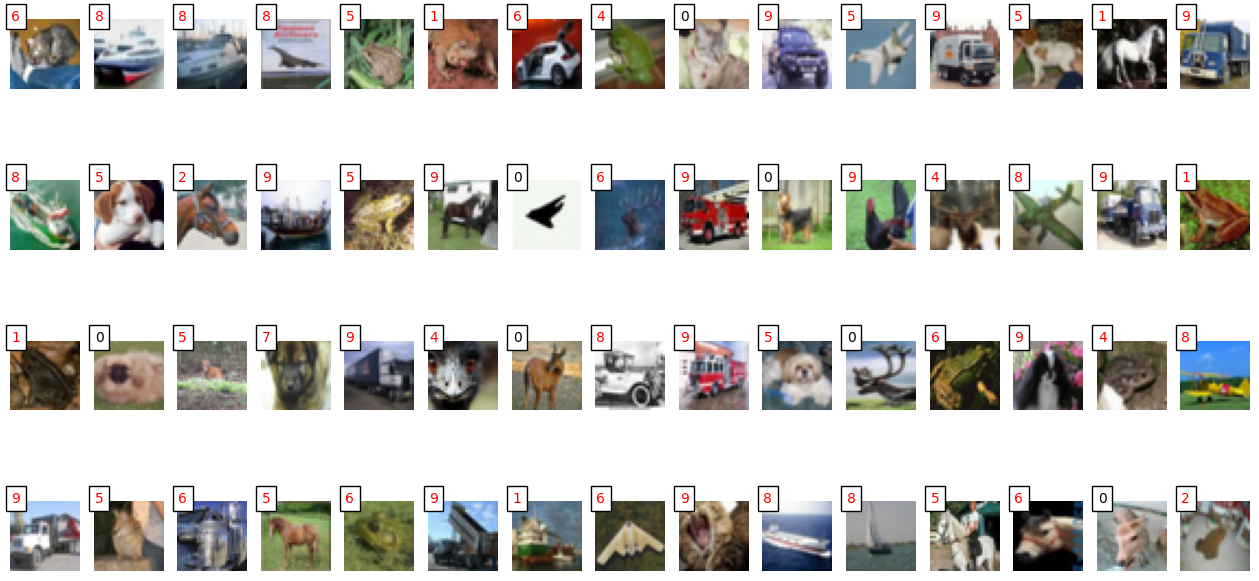

In [329]:
%timeit -n1 -r1 build_model(num_conv = 3, num_dense = 3)
# show_results(model)